In [1]:
import lorentz
import uproot
import uproot_methods.classes.TLorentzVector as LVepm
import numpy

In [2]:
#this can take a few minutes for large files
eventsMC = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_361107.Zmumu.2lep.root")["mini"]
eventsData = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_D.2lep.root")["mini"]


In [3]:
nEvents = 1000

lep_E, lep_pt, lep_phi, lep_eta = eventsData.arrays(["lep_E", "lep_pt", "lep_phi", "lep_eta"], outputtype=tuple, entrystop=nEvents)
flatData = LVepm.TLorentzVectorArray.from_ptetaphi(lep_pt, lep_eta, lep_phi, lep_E)

lep_E, lep_pt, lep_phi, lep_eta = eventsMC.arrays(["lep_E", "lep_pt", "lep_phi", "lep_eta"], outputtype=tuple, entrystop=nEvents)
flatMC = LVepm.TLorentzVectorArray.from_ptetaphi(lep_pt, lep_eta, lep_phi, lep_E)

len(flatData)

1000

In [4]:
massesData = numpy.array([])
massesMC = numpy.array([])

for ev in flatMC:
    mumu = ev[0] + ev[1]
    mass = mumu.mass
    massesMC = numpy.append(massesMC,mass)
    
for ev in flatData:
    mumu = ev[0] + ev[1]
    mass = mumu.mass
    massesData = numpy.append(massesData,mass)

In [5]:
histogramMC = None
histogramData = None

counts, edges = numpy.histogram(massesMC, bins=50, range=(0, 150000))

if histogramMC is None:
    histogramMC = counts, edges
else:
    histogramMC = histogramMC[0] + counts, edges
    
counts, edges = numpy.histogram(massesData, bins=50, range=(0, 150000))

if histogramData is None:
    histogramData = counts, edges
else:
    histogramData = histogramData[0] + counts, edges

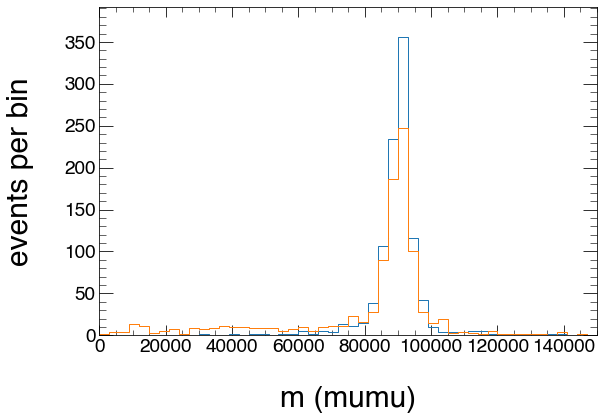

In [9]:
import matplotlib.pyplot

countsMC, edges = histogramMC

matplotlib.pyplot.step(x=edges, y=numpy.append(countsMC, 0), where="post");

countsData, edges = histogramData

matplotlib.pyplot.step(x=edges, y=numpy.append(countsData, 0), where="post");

matplotlib.pyplot.xlim(edges[0], edges[-1]);
matplotlib.pyplot.ylim(0, countsMC.max() * 1.1);
matplotlib.pyplot.xlabel("m (mumu)");
matplotlib.pyplot.ylabel("events per bin");
matplotlib.pyplot.show()

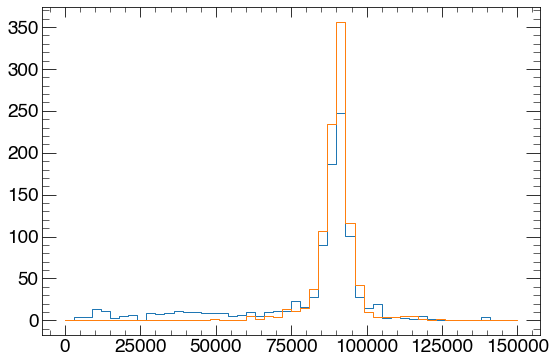

In [14]:
import mplhep as hep
matplotlib.pyplot.style.use(hep.style.ATLAS)

#hep.histplot(histogramData, edges)
#hep.histplot([h, 1.5*h], bins, ax=axs[0])

fig, ax = plt.subplots()


hep.histplot([countsData, countsMC], edges, label=["Data", "Simulation"])
axs[3].legend(fontsize=16)

